# LMS Algorithm

In [1]:
using FFTW
using Plots
using LinearAlgebra
using DSP

In [2]:
include("../modules/operations.jl")

norm (generic function with 17 methods)

In [3]:
include("lms.jl")

solve (generic function with 1 method)

In [4]:
# Helper function to generate a noisy sinusoidal signal
function generate_signals(frequency, Fs, duration, noise_level)
    t = 0:1/Fs:duration
    clean_signal = sin.(2π * frequency * t)
    noise = noise_level * randn(length(t))
    noisy_signal = clean_signal + noise
    return t, clean_signal, noisy_signal
end


generate_signals (generic function with 1 method)

In [5]:
# Define parameters
frequency = 1.0   # frequency of the sinusoid
Fs = 100          # sampling frequency
duration = 2.0    # duration of the signal in seconds
noise_level = 0.5 # noise amplitude

# Generate signals
t, clean_signal, noisy_signal = generate_signals(frequency, Fs, duration, noise_level)

# LMS algorithm parameters
Δ = 0.01  # step size (learning rate)
N = 20    # length of the FIR filter (number of coefficients)

# Apply the LMS algorithm
ĥ, y = solve(LeastMeanSquare(noisy_signal, clean_signal, Δ, N));

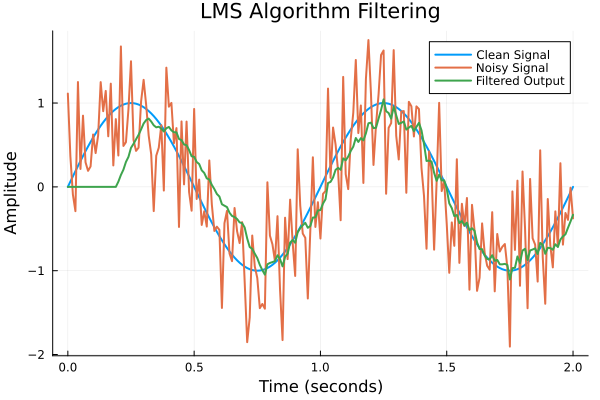

In [6]:
# Plot the results
plot(t, [clean_signal, noisy_signal, y],
     label=["Clean Signal" "Noisy Signal" "Filtered Output"],
     title="LMS Algorithm Filtering",
     xlabel="Time (seconds)",
     ylabel="Amplitude",
     linewidth=2)

## Another example

Estimated FIR filter coefficients: [0.11558837302270823, 0.10998828465778918, 0.11094665480012715, 0.11217363202588021, 0.11742092283402454]


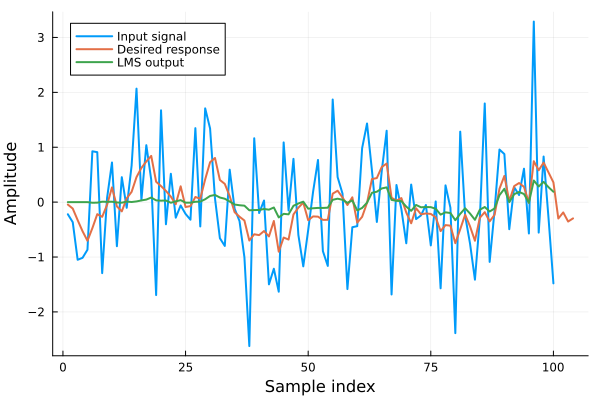

In [7]:
# Generate example input signals and desired responses
x = randn(100)  # Input signal
kernel = ones(5) / 5  # Moving average filter kernel
d = x ⊗ kernel  # Desired response (filtered input) using convolution operator

# Define LMS parameters
Δ = 0.01  # Step size
N = 5     # FIR filter length

# Apply LMS algorithm
ĥ, y = solve(LeastMeanSquare(x, d, Δ, N))

# Print estimated FIR filter coefficients
println("Estimated FIR filter coefficients: ", ĥ)

# Plot original signal, desired response, and output of the LMS algorithm
using Plots
plot([x, d, y]
    , label=["Input signal" "Desired response" "LMS output"]
    , xlabel="Sample index", ylabel="Amplitude"
    , linewidth = 2
)


# References
- [ ] [Wikipedia: Least mean squares filter](https://en.wikipedia.org/wiki/Least_mean_squares_filter)
- [ ] [Digital Signal Processing Using MATLAB](https://www.amazon.com/Digital-Signal-Processing-Using-Matlab/dp/0534938051)
```matlab
function [h,y] = lms(x,d,delta,N)
% LMS Algorithm for Coefficient Adjustment
% ----------------------------------------
% [h,y] = lms(x,d,delta,N)
%     h = estimated FIR filter
%     y = output array y(n)
%     x = input array x(n)
%     d = desired array d(n), length must be same as x
% delta = step size
%     N = length of the FIR filter
%
M = length(x); y = zeros(1,M);
h = zeros(1,N);
for n = N:M
    x1 = x(n:-1:n-N+1);
     y = h * x1’;
     e = d(n) - y;
     h = h + delta*e*x1;
end
```

In [15]:
# Define the LMS filter function
function lms_filter(x, d, μ, p)
    N = length(x)  # Total number of samples
    ĥ = zeros(Complex{Float64}, p)  # Initial filter coefficients
    y = zeros(Complex{Float64}, N)  # Output signal array
    e = zeros(Complex{Float64}, N)  # Error signal array
    
    # LMS Algorithm Iteration
    for n in p:N
        x_n = x[n:-1:n-p+1]  # Input vector at time n
        y[n] = ĥ' * x_n  # Filter output as the dot product of ĥ and x_n
        e[n] = d[n] - y[n]  # Error calculation
        ĥ += μ * conj(e[n]) * x_n  # Filter coefficients update
    end
    
    return ĥ, y, e
end

# Example usage
p = 4  # Filter order
μ = 0.01  # Step size
x = randn(100) + im * randn(100)  # Example complex input signal
d = randn(100) + im * randn(100)  # Desired complex signal

ĥ, y, e = lms_filter(x, d, μ, p)


(ComplexF64[-0.035281213552137036 + 0.014531377297367348im, 0.0676477836579959 + 0.0705047749180183im, 0.003199760716187633 - 0.029441286012265942im, 0.017083226600831607 - 0.01908721768001087im], ComplexF64[0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0010744427201052828 + 0.018520721923958393im, -0.09841754721498149 - 0.03291621385949583im, 0.048679634317006906 - 0.02328651780638415im, 0.007657024043842411 - 0.05045609328067284im, 0.04617170733712399 - 0.04013310962420873im, 0.006621302835239189 + 0.03065279292151865im  …  -0.13653362859132678 + 0.2198695095040299im, 0.025731013586624184 + 0.026018884965523896im, -0.08223213599191982 - 0.11980620233322606im, 0.10374539472790975 + 0.2223669620365128im, 0.0933086511895843 + 0.06562932717008824im, -0.21650904889918401 + 0.04626049781634606im, -0.07195507039034486 - 0.10373320930092052im, 0.015285927001674901 - 0.009673058802617915im, 0.007434315811681573 - 0.0228766601025299im, -0.03736954081483758 - 0.09249959561154597im], Com